# Gender Classification

With the aid of a labelled dataset, supervised machine learning is used to categorize data or generate predictions.

This dataset allows for the identification of specific human facial characteristics and the assignment of their gender. I will be developing a model to determine the gender based on the attributes.

# Import Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split #Import train_test_split function to split data into train and test sets
from sklearn.tree import DecisionTreeClassifier #DecisionTree
from sklearn.linear_model import LogisticRegression #LogisticRegression
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.ensemble import RandomForestClassifier #Random Forest

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import Dataset
dataset = pd.read_csv('gender_classification_v7.csv')

# Data Understanding

In [3]:
#Look at the first five rows of the dataset
dataset.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [4]:
#Check the total no. of rows and columns
dataset.shape

(5001, 8)

There are a total of 5001 records with 7 attributes (independent variables) to determine the gender (dependent variable)

In [5]:
#Check data type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


Every attribute, excluding gender, has a numerical type. Gender must be transformed into a integer form to be machine-readable

In [6]:
#Check for missing values
dataset.isna().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

There are no missing values

In [7]:
#Check for duplicate records
dataset.duplicated().sum()

1768

There are 1768 duplicate records with 3233 distinct records

In [8]:
#Check statistic of the dataset
dataset.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


# Exploratory Data Analysis

Female    2501
Male      2500
Name: gender, dtype: int64

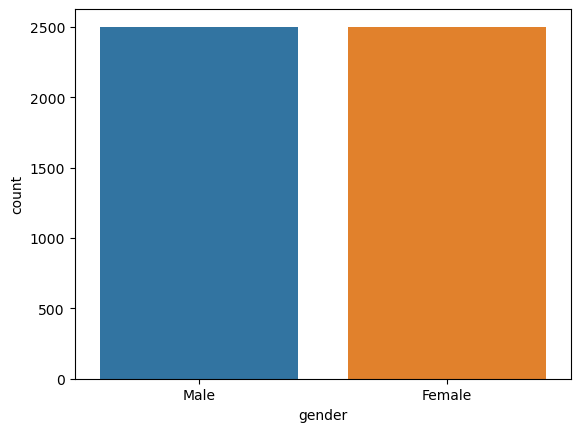

In [9]:
#Gender distribution
sns.countplot(x = "gender", data = dataset)
dataset.loc[:,"gender"].value_counts()

It is normal humans have similar traits with one another. Since the difference to the gender distribution is by 1 person, it does not significantly affect the outcome of the prediction. Hence, the duplicate records are not removed

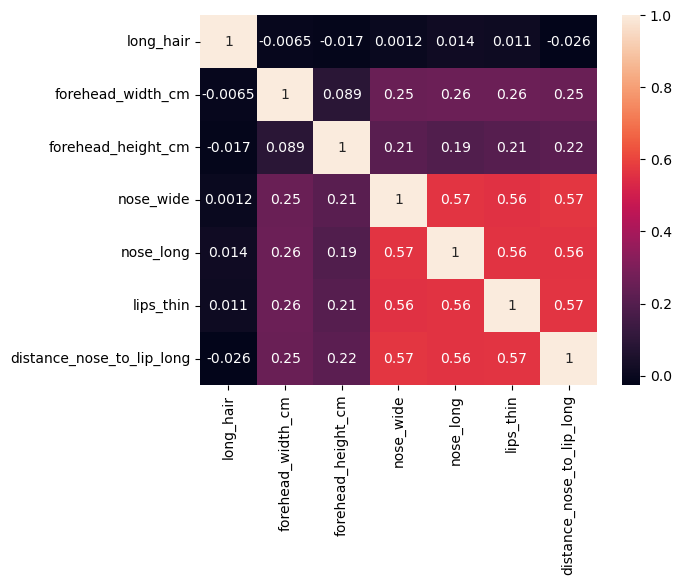

In [10]:
#Finding correlation using heatmap
sns.heatmap(dataset.corr(), annot=True)
plt.show()

1. The correlation between the numerical data is visualized using a heatmap. The outcome is between 0 and 1. If the outcome is closer to 0, it indicates there is little to no association between the variables and stronger relationship if it is closer to 1. 


2. Long hair is not be a reliable indicator of gender


3. The strongest correlation between nose_wide, nose_long, lips_thin, and distance_nose_to_lips_long is between 0.74 to 0.76. It is crucial to determine the gender

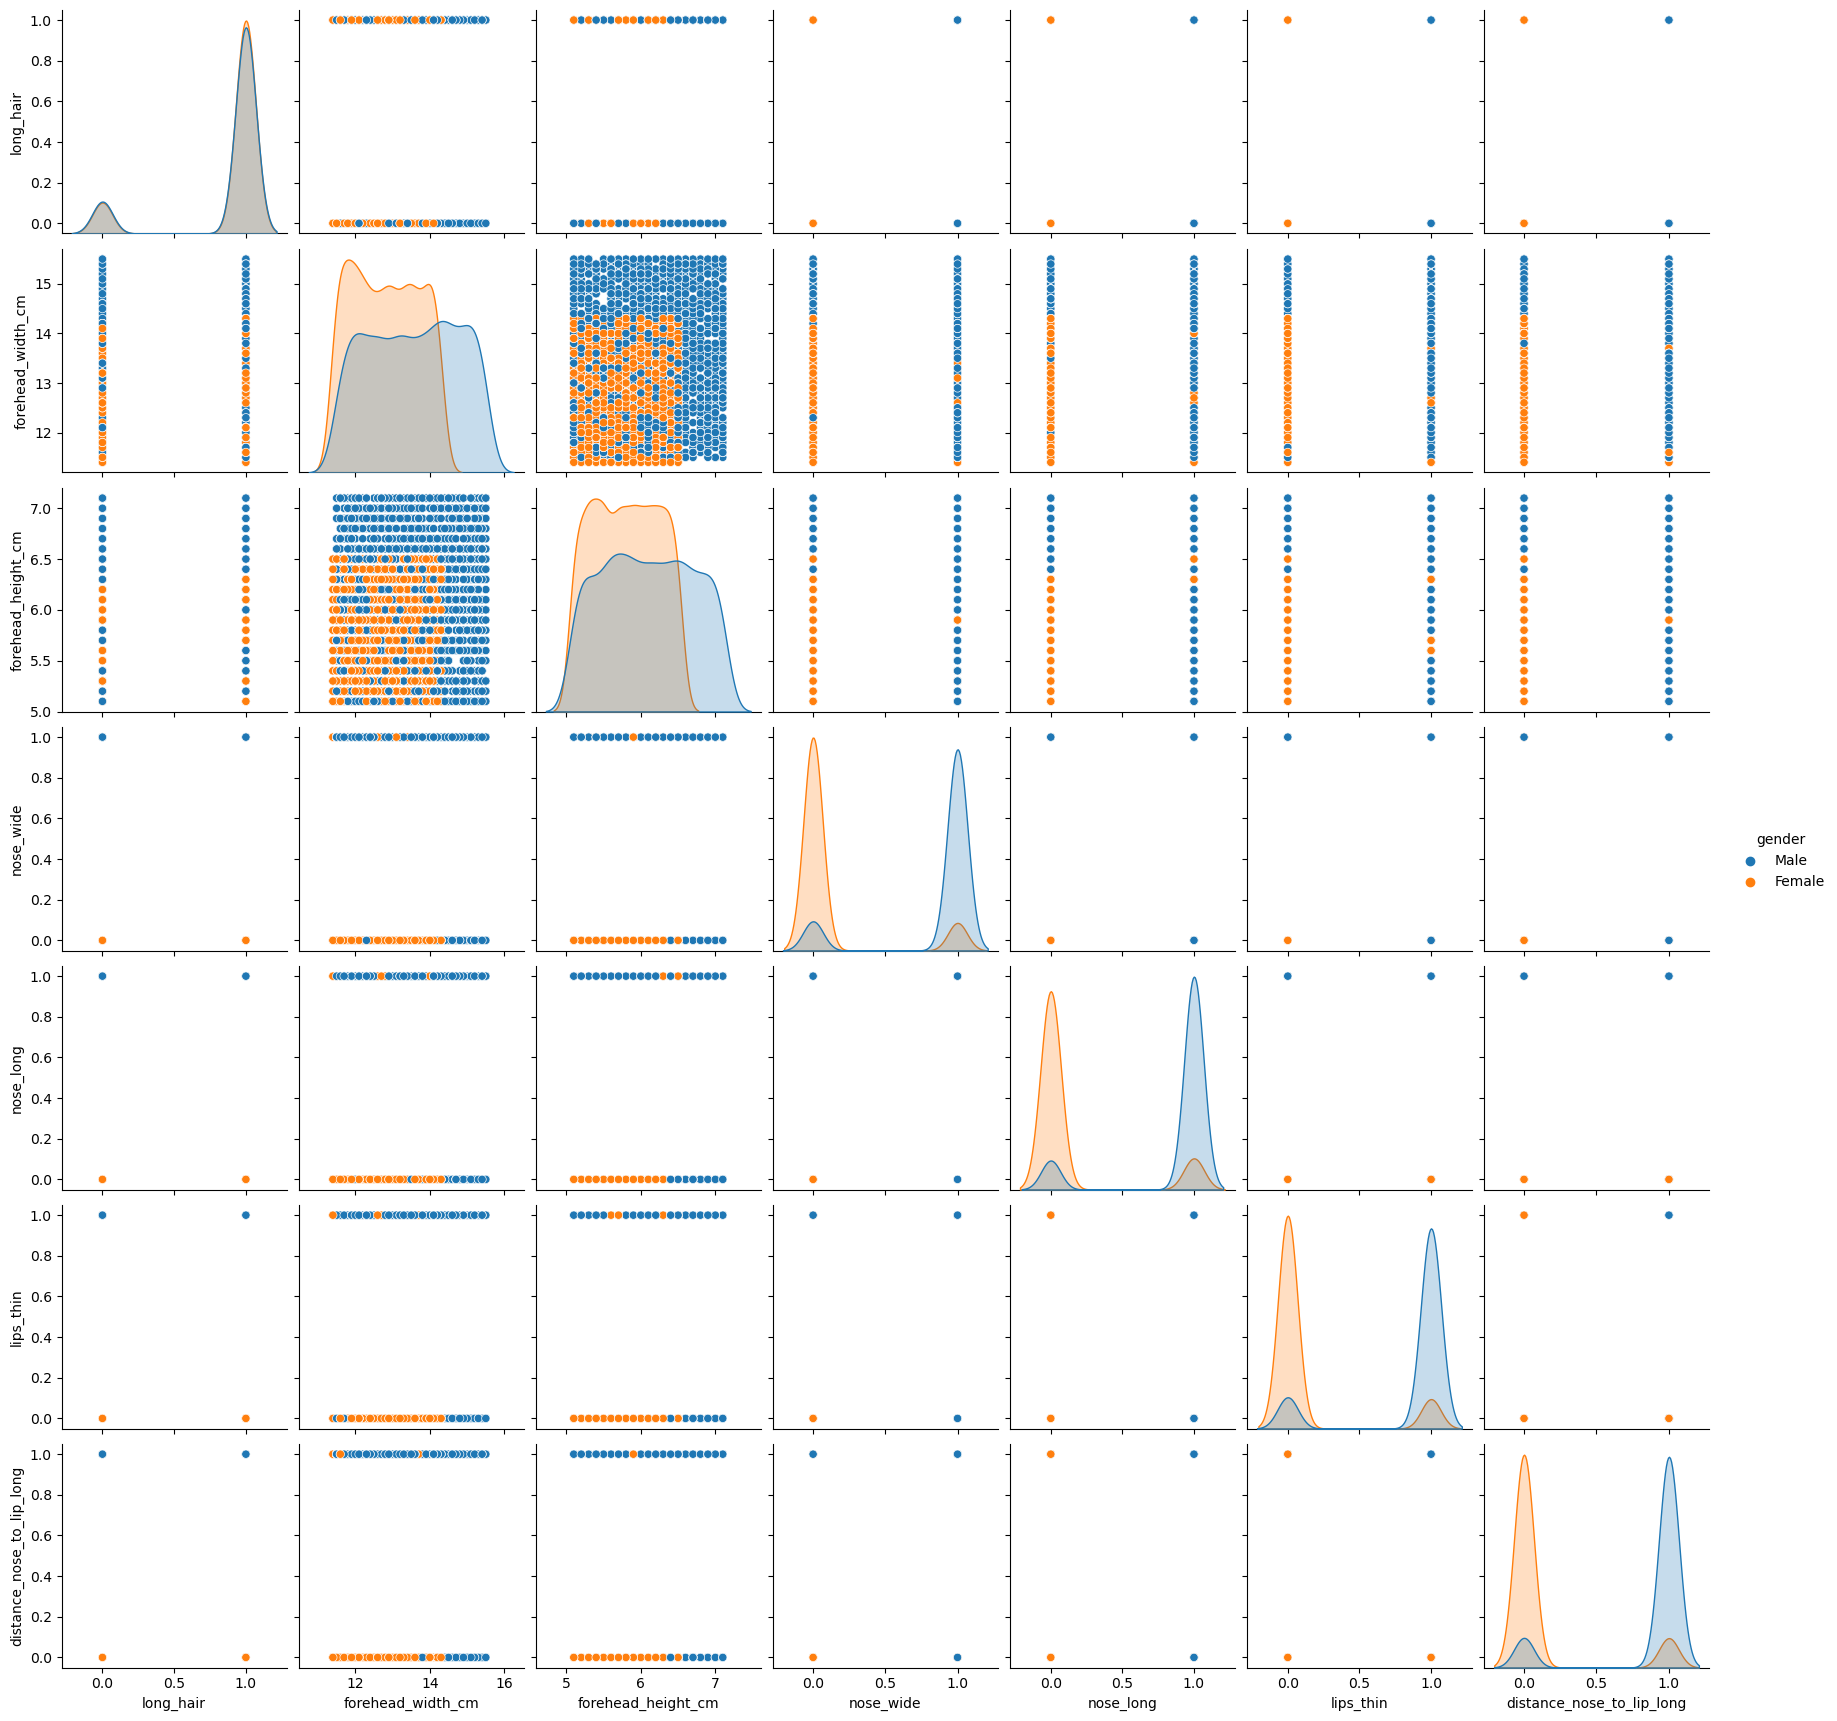

In [11]:
#Pairplot 
sns.pairplot(dataset, hue='gender')

<AxesSubplot:>

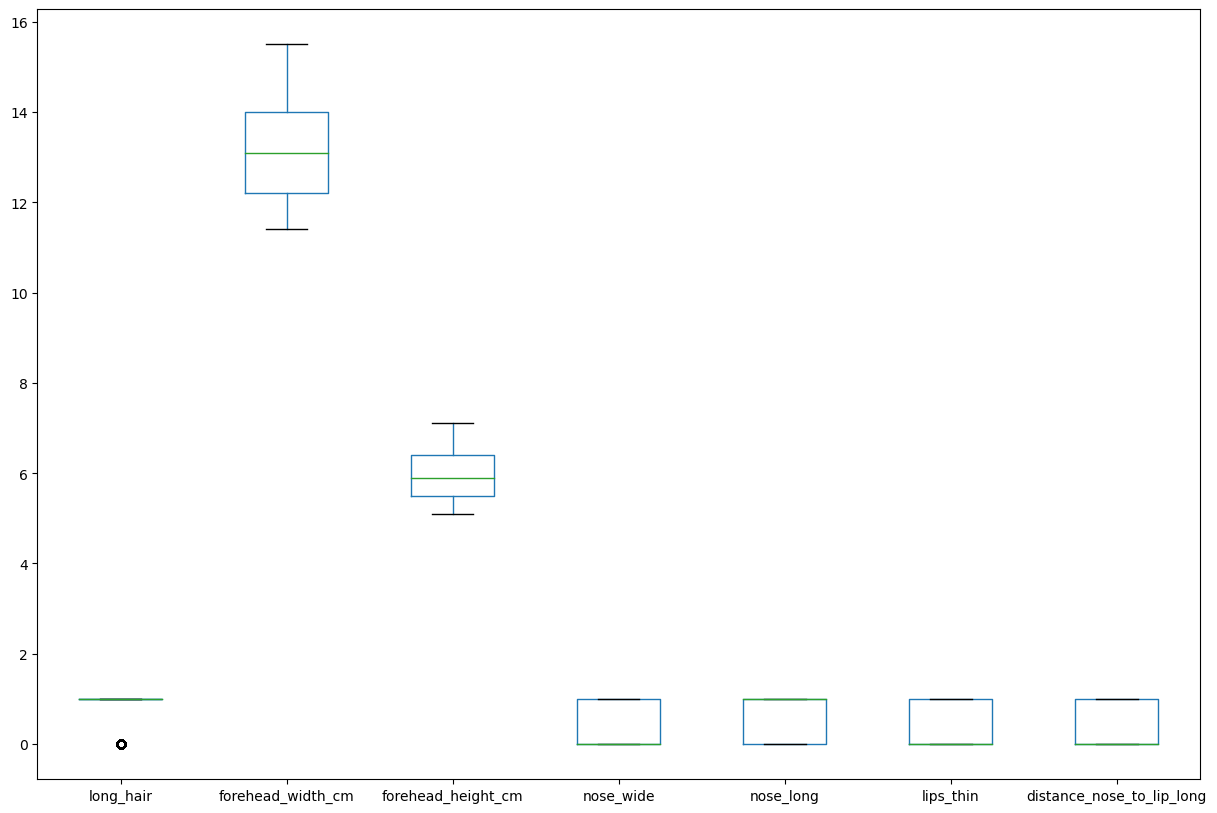

In [12]:
#Check for outliers with Boxplot
dataset.boxplot(figsize=(15,10),grid=False)

Outlier is spotted in long_hair. As I will be dropping the entire column (since there is no correlation to gender), the outlier will no longer be significant.

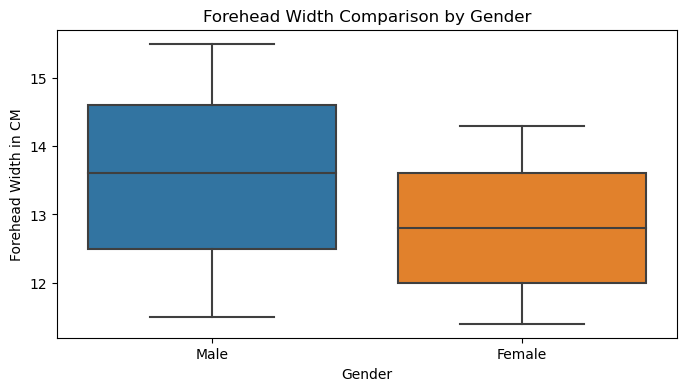

In [13]:
#Comparison of Forehead Width by Gender
plt.figure(figsize=(8,4))
sns.boxplot(x='gender', y="forehead_width_cm", data=dataset)
plt.title('Forehead Width Comparison by Gender')
plt.xlabel('Gender')
plt.ylabel('Forehead Width in CM')
plt.show()

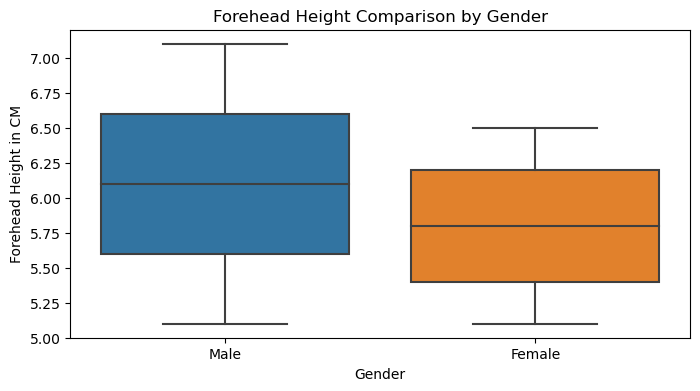

In [14]:
#Comparison of Forehead Height by Gender
plt.figure(figsize=(8,4))
sns.boxplot(x='gender', y="forehead_height_cm", data=dataset)
plt.title('Forehead Height Comparison by Gender')
plt.xlabel('Gender')
plt.ylabel('Forehead Height in CM')
plt.show()

Based on the box plot comparison, males have a wider and higher forehead compared to females

# Data Cleaning 

In [15]:
#Convert gender categorial value into numerical value
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['gender'] = le.fit_transform(dataset['gender'])
dataset.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


I need to convert gender value into numerical form to be machine-readable when I feed into my algorithm later on.

After converting:

0 - Female
1 - Male

In [16]:
#Drop long_hair column from the dataset as there is no correlation at all
dataset = dataset.drop(labels='long_hair', axis=1)
dataset.head()

,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,11.8,6.1,1,0,1,1,1
1,14.0,5.4,0,0,1,0,0
2,11.8,6.3,1,1,1,1,1
3,14.4,6.1,0,1,1,1,1
4,13.5,5.9,0,0,0,0,0


In [17]:
#dataset.drop_duplicates(inplace=True)
#dataset.shape

# Splitting Data into Training and Test Sets

Classification is a two-sto process in Machine Learning - 1) Learning and 2) Prediction. We first split the dataset into training and testing dataset. Model is developed based on the training data. Then the model is used to predict the outcome for a given data. 

In [18]:
#Defining the input and output attributes
X = dataset.drop(['gender'], axis=1)
y = dataset['gender']

X - Independent Variables (7 Facial Features)

Y = Dependent Variable (Gender)

In [19]:
#Splitting the data into training and test set
#Train 80%, Test 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=30)

In [20]:
#Distribution count of the Train and Test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 6)
(1001, 6)
(4000,)
(1001,)


I explored several train and test sizes and found that I have a better outcome with 80% training and 20% testing with a random state of 30. 

# Model Development

Decision Tree, K-Nearest Neighbor (KNN) and Logistic Regression models are used and accuracies are recorded below.

# Decision Tree

The goal of Decision Tree is to create a training model that can be used to predict the class or value of the outcome by learning decision rule inferred from training dataset. 

In [21]:
classifier= DecisionTreeClassifier(criterion='entropy', random_state=3)  

#Fitting the data into model
classifier.fit(X_train, y_train)

#Predicting the test set result  
y_pred= classifier.predict(X_test)

Text(50.722222222222214, 0.5, 'Actual')

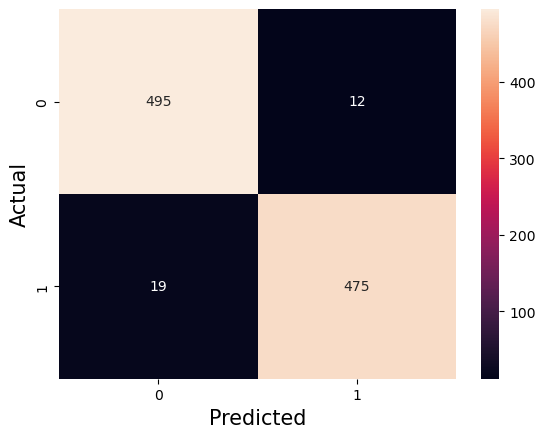

In [22]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True,fmt='.4g')
plt.xlabel('Predicted', size = 15)
plt.ylabel('Actual', size = 15)

True Positive: 495 correctly predicted as Female

True Negative: 475 corrected predicted as Male

False Positive: 19 males wrongly predicted as Female

False Negative: 12 females wrongly predicted as Male

In [23]:
#Accuracy Score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9690309690309691


In [24]:
#Accuracy - Precision
print('Precision Accuracy: %.3f' % precision_score(y_test, y_pred))

#Accuracy - Recall (Model Evaluation)
print('Recall Accuracy: %.3f' % recall_score(y_test, y_pred),'\n')

#Checking performance of the model
print(metrics.classification_report(y_test, y_pred))

Precision Accuracy: 0.975
Recall Accuracy: 0.962 

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       507
           1       0.98      0.96      0.97       494

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001



In [25]:
#Using Cross Validation for Model Evaluation
print(); print(cross_val_score(classifier, X, y, scoring="accuracy", cv = 10))
mean_score = cross_val_score(classifier, X, y, scoring="accuracy", cv = 10).mean()
std_score = cross_val_score(classifier, X, y, scoring="accuracy", cv = 10).std()
print(mean_score)
print(std_score)


[0.94011976 0.958      0.974      0.958      0.972      0.972
 0.964      0.962      0.976      0.97      ]
0.9646119760479044
0.01024949117149844


In [26]:
#Create Decision Tree Model
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

#Train Decision Tree Model
clf = clf.fit(X_train,y_train)

#Prediction
y_pred = clf.predict(X_test)

In [27]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.968031968031968


# KNN

KNN uses proximity to make classifications or predictions about the grouping of an individual data point.

In [28]:
#initialize the model
knn = KNeighborsClassifier(n_neighbors = 3, metric = 'manhattan')

#Fitting the data
knn.fit(X_train, y_train)

print('accuracy (Train):', knn.score(X_train, y_train))
print('accuracy (Test):', knn.score(X_test, y_test))

accuracy (Train): 0.98025
accuracy (Test): 0.972027972027972


In [29]:
#Make the Predictions
y_pred = knn.predict(X_test)

In [30]:
#Accuracy Score
knn.score(X_test,y_test)

0.972027972027972

[0.9590409590409591, 0.967032967032967, 0.973026973026973, 0.972027972027972, 0.972027972027972, 0.971028971028971, 0.9790209790209791, 0.9760239760239761, 0.978021978021978, 0.977022977022977]


Text(0, 0.5, 'Testing Accuracy')

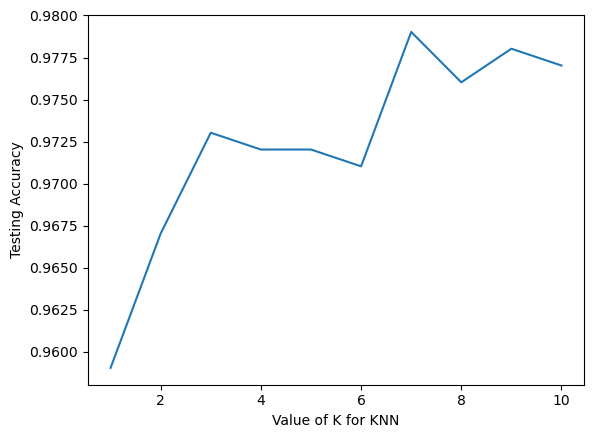

In [31]:
#Find the optimal K-value. Ranging K between 1 to 10
k_range = range(1, 11)

#Add the k-value to scores dictionary after fitting into the model
scores = []

#Use loop through the range 1 to 10 and add scores to the scores dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

%matplotlib inline

#Plot relationship between K and test accuracy 
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

Text(50.722222222222214, 0.5, 'Actual')

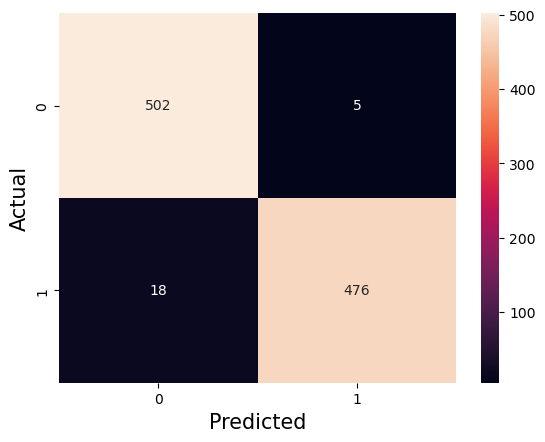

In [32]:
#Confusion Matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True,fmt='.4g')
plt.xlabel('Predicted', size = 15)
plt.ylabel('Actual', size = 15)

True Positive: 502 correctly predicted as Female

True Negative: 476 corrected predicted as Male

False Positive: 18 males wrongly predicted as Female

False Negative: 5 females wrongly predicted as Male

In [33]:
#Precision Accuracy
print('Precision Accuracy: %.3f' % precision_score(y_test, y_pred))

#Recall Accuracy
print('Recall Accuracy: %.3f' % recall_score(y_test, y_pred),'\n')

#Checking performance of the model
print(metrics.classification_report(y_test, y_pred))

Precision Accuracy: 0.990
Recall Accuracy: 0.964 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       507
           1       0.99      0.96      0.98       494

    accuracy                           0.98      1001
   macro avg       0.98      0.98      0.98      1001
weighted avg       0.98      0.98      0.98      1001



# Logistic Regression

It is a statistical method used to predict the outcome of a dependent variable based on previous observations. 

In [34]:
#Create Logistic Regression Model
LogReg= LogisticRegression(random_state = 42)

#Train the Model
LogReg.fit(X_train, y_train)

print('accuracy (Train):', LogReg.score(X_train, y_train))
print('accuracy (Test):', LogReg.score(X_test, y_test))

accuracy (Train): 0.96725
accuracy (Test): 0.972027972027972


In [35]:
#Prediction
y_pred = LogReg.predict(X_test)

In [36]:
#Accuracy
acc = accuracy_score(y_test,y_pred)
print('Accuracy is ', acc)

Accuracy is  0.972027972027972


Accuracy using Confusion Matrix is:  [[492  15]
 [ 13 481]]


Text(50.722222222222214, 0.5, 'Actual')

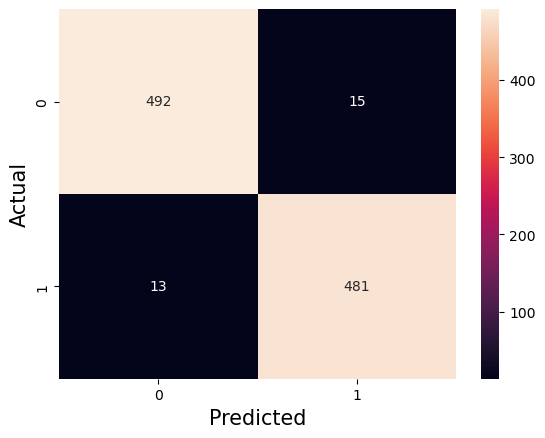

In [37]:
#Confusion Matrix
cm = confusion_matrix(y_test,y_pred)
print('Accuracy using Confusion Matrix is: ',cm)
sns.heatmap(cm, annot=True,fmt='.4g')
plt.xlabel('Predicted', size = 15)
plt.ylabel('Actual', size = 15)

True Positive: 492 correctly predicted as Female

True Negative: 481 corrected predicted as Male

False Positive: 13 males wrongly predicted as Female

False Negative: 15 females wrongly predicted as Male

In [38]:
#Precision Accuracy
print('Precision Accuracy: %.3f' % precision_score(y_test, y_pred))

#Recall Accuracy
print('Recall Accuracy: %.3f' % recall_score(y_test, y_pred))

#Checking performance of the model
print(metrics.classification_report(y_test, y_pred))

Precision Accuracy: 0.970
Recall Accuracy: 0.974
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       507
           1       0.97      0.97      0.97       494

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001



# Conclusion

The models are tested by removing and preserving the duplicate records. The accuracy differences are negligible. The accuracy ranges from 94% to 97% if duplicates are removed and 95% to 99% if duplicates remains. 

I maintain the duplicate records as it is common to have traits that are identical. KNN is the most accurate method for this dataset, with 99% accuracy and has the fewest numbers of data points wrongly predicted.